In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cdasws import CdasWs

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cdas = CdasWs()

nT_to_T = 1e-9
per_cmCubic_to_per_mCubic = 1e6
mu_0 = 4*np.pi*1e-7
m_proton = 1.6726219*1e-27

all databases:
- 3DP_PLSM (proton and alpha-particle)
- 3DP_ELM (electron)
- MFI (magnetic field)

In [17]:
selected_events = pd.read_pickle('selected_events.pkl')

In [18]:
initialize = False
if initialize:
    selected_events['proton_density_3DP'] = [np.nan,]*len(selected_events)
    selected_events['proton_speed_3DP'] = [np.nan,]*len(selected_events)
    selected_events['proton_temperature_3DP'] = [np.nan,]*len(selected_events)
    selected_events['alpha_density_3DP'] = [np.nan,]*len(selected_events)
    selected_events['electron_density_3DP'] = [np.nan,]*len(selected_events)
    selected_events['electron_speed_3DP'] = [np.nan,]*len(selected_events)
    selected_events['electron_temperature_3DP'] = [np.nan,]*len(selected_events)
selected_events[:5]

,start,end,duration,num_of_log,fill_rate,proton_density_3DP,proton_speed_3DP,proton_temperature_3DP,alpha_density_3DP,electron_density_3DP,electron_speed_3DP,electron_temperature_3DP
0,1999-05-11 18:25:00,1999-05-11 18:57:00,33,26,0.787879,0.271215,224.82663,6.51306,0.010688,NaN,NaN,NaN
1,2000-03-29 04:45:00,2000-03-29 05:12:00,28,25,0.892857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-20 04:17:00,2002-03-20 04:56:00,40,30,0.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-20 05:01:00,2002-03-20 05:11:00,11,8,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-20 05:29:00,2002-03-20 06:00:00,32,28,0.875000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
i_event = 0
t_start, t_end = selected_events.iloc[i_event][:2]
t_start_localize = t_start.tz_localize(tz='UTC')
t_end_localize = t_end.tz_localize(tz='UTC')

In [26]:
%%time
variables_3DP = ['FLUX','FLUX_STACKED','ENERGY','MOM.P.SC_CURRENT','MOM.P.MAGF','MOM.P.DENSITY','MOM.P.AVGTEMP','MOM.P.VTHERMAL','MOM.P.VELOCITY','MOM.P.FLUX','MOM.P.PTENS','MOM.P.MFTENS','MOM.P.T3','MOM.P.SYMM','MOM.P.SYMM_THETA','MOM.P.SYMM_PHI','MOM.P.SYMM_ANG','MOM.P.MAGT3','MOM.P.ERANGE','MOM.P.MASS','MOM.P.VALID','MOM.P.VEL_MAG','MOM.P.VEL_TH','MOM.P.VEL_PHI','MOM.A.SC_CURRENT','MOM.A.MAGF','MOM.A.DENSITY','MOM.A.AVGTEMP','MOM.A.VTHERMAL','MOM.A.VELOCITY','MOM.A.FLUX','MOM.A.PTENS','MOM.A.MFTENS','MOM.A.T3','MOM.A.SYMM','MOM.A.SYMM_THETA','MOM.A.SYMM_PHI','MOM.A.SYMM_ANG','MOM.A.MAGT3','MOM.A.ERANGE','MOM.A.MASS','MOM.A.VALID','MOM.A.VEL_MAG','MOM.A.VEL_TH','MOM.A.VEL_PHI','TIME']
status_3DP, data_3DP = cdas.get_data('WI_PLSP_3DP', variables_3DP, t_start_localize, t_end_localize)

print(data_3DP.keys())
# there is magnetic field interpolated to the epoch of protons

dict_keys(['Epoch', 'FLUX', 'FLUX_STACKED', 'ENERGY', 'MOM$P$SC_CURRENT', 'MOM$P$MAGF', 'MOM$P$DENSITY', 'MOM$P$AVGTEMP', 'MOM$P$VTHERMAL', 'MOM$P$VELOCITY', 'MOM$P$FLUX', 'MOM$P$PTENS', 'MOM$P$MFTENS', 'MOM$P$T3', 'MOM$P$SYMM', 'MOM$P$SYMM_THETA', 'MOM$P$SYMM_PHI', 'MOM$P$SYMM_ANG', 'MOM$P$MAGT3', 'MOM$P$ERANGE', 'MOM$P$MASS', 'MOM$P$VALID', 'MOM$P$VEL_MAG', 'MOM$P$VEL_TH', 'MOM$P$VEL_PHI', 'MOM$A$SC_CURRENT', 'MOM$A$MAGF', 'MOM$A$DENSITY', 'MOM$A$AVGTEMP', 'MOM$A$VTHERMAL', 'MOM$A$VELOCITY', 'MOM$A$FLUX', 'MOM$A$PTENS', 'MOM$A$MFTENS', 'MOM$A$T3', 'MOM$A$SYMM', 'MOM$A$SYMM_THETA', 'MOM$A$SYMM_PHI', 'MOM$A$SYMM_ANG', 'MOM$A$MAGT3', 'MOM$A$ERANGE', 'MOM$A$MASS', 'MOM$A$VALID', 'MOM$A$VEL_MAG', 'MOM$A$VEL_TH', 'MOM$A$VEL_PHI', 'TIME', 'ENERGY_good', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9', 'metavar10', 'metavar11', 'metavar12', 'metavar13', 'metavar14', 'metavar15', 'metavar16'])
CPU times: user 180 ms, sys: 

In [37]:
data_3DP['MOM$P$VELOCITY'].attrs

{'FIELDNAM': 'Proton Bulk Flow Velocity, cartesian',
 'CATDESC': '---> [P.VELOCITY] Proton Flow Velocity, GSE cartesian',
 'DICT_KEY': 'velocity',
 'VAR_TYPE': 'data',
 'FORMAT': 'f8.2',
 'UNITS': 'km/s',
 'FILLVAL': nan,
 'VALIDMIN': array([-1000., -1000., -1000.], dtype=float32),
 'VALIDMAX': array([1000., 1000., 1000.], dtype=float32),
 'DISPLAY_TYPE': 'time_series',
 'DEPEND_0': 'Epoch',
 'LABL_PTR_1': 'metavar2',
 'DIM_SIZES': 3}

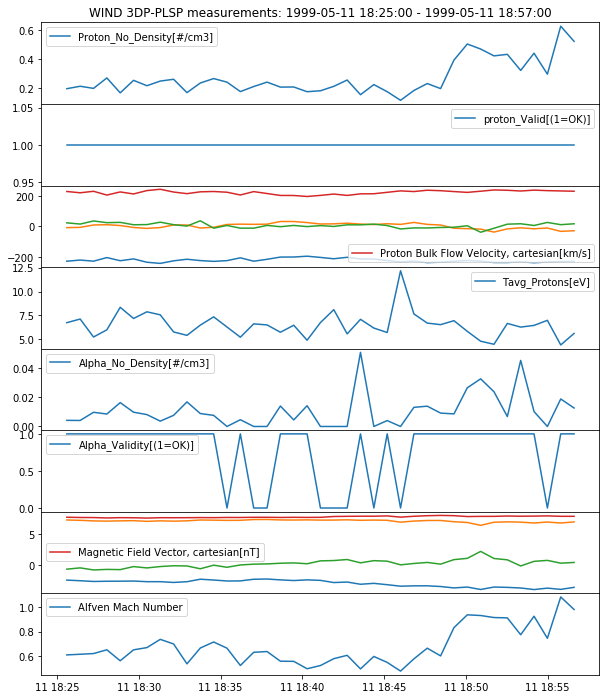

In [36]:
fig,axes = plt.subplots(8,figsize=(10,12))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'WIND 3DP-PLSP measurements: {t_start} - {t_end}')
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$DENSITY'],label=f"{data_3DP['MOM$P$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$P$DENSITY'].attrs['UNITS']}]")
ax = axes[1]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VALID'],label=f"{data_3DP['MOM$P$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$P$VALID'].attrs['UNITS']}]")
ax = axes[2]
p_speed_3DP = np.linalg.norm(data_3DP['MOM$P$VELOCITY'],axis=1)
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$VELOCITY'])
ax.plot(data_3DP['Epoch'],p_speed_3DP,label=f"{data_3DP['MOM$P$VELOCITY'].attrs['FIELDNAM']}[{data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}]")
ax = axes[3]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$AVGTEMP'],label=f"{data_3DP['MOM$P$AVGTEMP'].attrs['LABLAXIS']}[{data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}]")
ax = axes[4]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$DENSITY'],label=f"{data_3DP['MOM$A$DENSITY'].attrs['LABLAXIS']}[{data_3DP['MOM$A$DENSITY'].attrs['UNITS']}]")
ax = axes[5]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$A$VALID'],label=f"{data_3DP['MOM$A$VALID'].attrs['LABLAXIS']}[{data_3DP['MOM$A$VALID'].attrs['UNITS']}]")
ax = axes[6]
ax.plot(data_3DP['Epoch'],data_3DP['MOM$P$MAGF'])
mag_field_tr_interped_to_3DP = np.linalg.norm(data_3DP['MOM$P$MAGF'],axis=1)
ax.plot(data_3DP['Epoch'],mag_field_tr_interped_to_3DP,label=f"{data_3DP['MOM$P$MAGF'].attrs['FIELDNAM']}[{data_3DP['MOM$P$MAGF'].attrs['UNITS']}]")
ax = axes[7]

alfven_speed = (mag_field_tr_interped_to_3DP*nT_to_T)/np.sqrt(mu_0*m_proton*data_3DP['MOM$P$DENSITY']*per_cmCubic_to_per_mCubic)
alfven_speed = alfven_speed / 1000
alfven_mach = p_speed_3DP / alfven_speed
ax.plot(data_3DP['Epoch'],alfven_mach,label='Alfven Mach Number')

for ax in axes:
    ax.legend(loc='best')
    if ax!= axes[-1]:
        ax.set_xticks([])

_ = 0;

In [8]:
p_density_3DP_avg = np.mean(data_3DP['MOM$P$DENSITY'])
p_density_3DP_std = np.std(data_3DP['MOM$P$DENSITY'])
p_speed_3DP_avg = np.mean(p_speed_3DP)
p_speed_3DP_std = np.std(p_speed_3DP)
p_temperature_3DP_avg = np.mean(data_3DP['MOM$P$AVGTEMP'])
# average over the whole segment
alpha_density_3DP_avg = np.mean(data_3DP['MOM$A$DENSITY']*data_3DP['MOM$A$VALID'])


print(f"p_density_3DP_avg: {p_density_3DP_avg:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_density_3DP_std: {p_density_3DP_std:.4} {data_3DP['MOM$P$DENSITY'].attrs['UNITS']}")
print(f"p_speed_3DP_avg: {p_speed_3DP_avg:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_speed_3DP_std: {p_speed_3DP_std:.4} {data_3DP['MOM$P$VELOCITY'].attrs['UNITS']}")
print(f"p_temperature_3DP_avg: {p_temperature_3DP_avg:.4} {data_3DP['MOM$P$AVGTEMP'].attrs['UNITS']}")
print(f"alpha_density_3DP_avg: {alpha_density_3DP_avg:.4} {data_3DP['MOM$A$DENSITY'].attrs['UNITS']}")

selected_events.loc[i_event,'proton_density_3DP'] = p_density_3DP_avg
selected_events.loc[i_event,'proton_speed_3DP'] = p_speed_3DP_avg
selected_events.loc[i_event,'proton_temperature_3DP'] = p_temperature_3DP_avg
selected_events.loc[i_event,'alpha_density_3DP'] = alpha_density_3DP_avg

p_density_3DP_avg: 0.2712 #/cm3
p_density_3DP_std: 0.1163 #/cm3
p_speed_3DP_avg: 224.8 km/s
p_speed_3DP_std: 12.2 km/s
p_temperature_3DP_avg: 6.513 eV
alpha_density_3DP_avg: 0.01069 #/cm3


In [16]:
# selected_events.to_pickle('selected_events.pkl')
# use it if necessary.

In [11]:
%%time
variables_3DP_ELM = ['SC_POT','SC_CURRENT','MAGF','DENSITY','AVGTEMP','VTHERMAL','VELOCITY','FLUX','PTENS','MFTENS','T3','SYMM','SYMM_THETA','SYMM_PHI','SYMM_ANG','MAGT3','ERANGE','MASS','VALID','VEL_MAG','VEL_TH','VEL_PHI','TIME']
status_3DP_ELM, data_3DP_ELM = cdas.get_data('WI_ELM2_3DP', variables_3DP_ELM, t_start_localize, t_end_localize)

print(data_3DP_ELM.keys())

CPU times: user 104 ms, sys: 5.55 ms, total: 110 ms
Wall time: 2.91 s


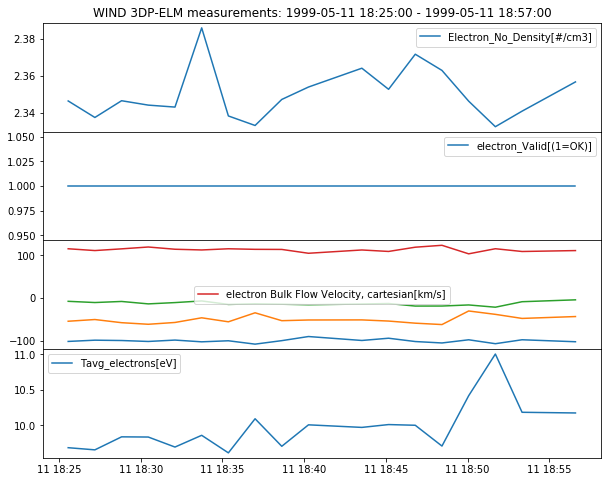

In [14]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)
ax = axes[0]
ax.set_title(f'WIND 3DP-ELM measurements: {t_start} - {t_end}')
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['DENSITY'],
    label=f"{data_3DP_ELM['DENSITY'].attrs['LABLAXIS']}[{data_3DP_ELM['DENSITY'].attrs['UNITS']}]"
)
ax = axes[1]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['VALID'],
    label=f"{data_3DP_ELM['VALID'].attrs['LABLAXIS']}[{data_3DP_ELM['VALID'].attrs['UNITS']}]"
)
ax = axes[2]
# 'AVGTEMP', 'VTHERMAL', 'VELOCITY'
ax.plot(data_3DP_ELM['Epoch'],data_3DP_ELM['VELOCITY'],)
ax.plot(
    data_3DP_ELM['Epoch'],np.linalg.norm(data_3DP_ELM['VELOCITY'],axis=1),
    label=f"{data_3DP_ELM['VELOCITY'].attrs['FIELDNAM']}[{data_3DP_ELM['VELOCITY'].attrs['UNITS']}]"
)
ax = axes[3]
ax.plot(
    data_3DP_ELM['Epoch'],data_3DP_ELM['AVGTEMP'],
    label=f"{data_3DP_ELM['AVGTEMP'].attrs['LABLAXIS']}[{data_3DP_ELM['AVGTEMP'].attrs['UNITS']}]"
)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])

_ = 0;

In [20]:
e_density_3DP_avg = np.mean(data_3DP_ELM['DENSITY'])
e_density_3DP_std = np.std(data_3DP_ELM['DENSITY'])
e_speed_3DP = np.linalg.norm(data_3DP_ELM['VELOCITY'],axis=1)
e_speed_3DP_avg = np.mean(e_speed_3DP)
e_speed_3DP_std = np.std(e_speed_3DP)
e_temperature_3DP_avg = np.mean(data_3DP_ELM['AVGTEMP'])

print(f"e_density_3DP_avg: {e_density_3DP_avg:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_density_3DP_std: {e_density_3DP_std:.4} {data_3DP_ELM['DENSITY'].attrs['UNITS']}")
print(f"e_speed_3DP_avg: {e_speed_3DP_avg:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_speed_3DP_std: {e_speed_3DP_std:.4} {data_3DP_ELM['VELOCITY'].attrs['UNITS']}")
print(f"e_temperature_3DP_avg: {e_temperature_3DP_avg:.4} {data_3DP_ELM['AVGTEMP'].attrs['UNITS']}")

selected_events.loc[i_event,'electron_density_3DP'] = e_density_3DP_avg
selected_events.loc[i_event,'electron_speed_3DP'] = e_speed_3DP_avg
selected_events.loc[i_event,'electron_temperature_3DP'] = e_temperature_3DP_avg

e_density_3DP_avg: 2.35 #/cm3
e_density_3DP_std: 0.01349 #/cm3
e_speed_3DP_avg: 113.1 km/s
e_speed_3DP_std: 4.745 km/s
e_temperature_3DP_avg: 9.972 eV


In [22]:
selected_events.to_pickle('selected_events.pkl')
# use it if necessary.

In [25]:
%%time
variables_MFI = ['BF1','BF1LOG','BRMSF1','BGSM','BRMSGSM','BGSE','BGSEa','BRMSGSE','DIST','PGSM','PGSE','B3F1','B3F1LOG','B3RMSF1','B3GSM','B3RMSGSM','B3GSE','B3GSEa','B3RMSGSE','B1F1','B1F1LOG','B1RMSF1','B1GSM','B1RMSGSM','B1GSE','B1GSEa','B1RMSGSE','DIST1','P1GSM','P1GSE','DISTV','PGSMV','PGSEV','DIST1V','P1GSMV','P1GSEV']
status_MFI, data_MFI = cdas.get_data('WI_H0_MFI', variables_MFI, t_start_localize, t_end_localize)
print(data_MFI.keys())

dict_keys(['Epoch', 'Epoch3', 'Epoch1', 'BF1', 'BF1LOG', 'BRMSF1', 'BGSM', 'BRMSGSM', 'BGSE', 'BGSEa', 'BRMSGSE', 'DIST', 'PGSM', 'PGSE', 'B3F1', 'B3F1LOG', 'B3RMSF1', 'B3GSM', 'B3RMSGSM', 'B3GSE', 'B3GSEa', 'B3RMSGSE', 'B1F1', 'B1F1LOG', 'B1RMSF1', 'B1GSM', 'B1RMSGSM', 'B1GSE', 'B1GSEa', 'B1RMSGSE', 'DIST1', 'P1GSM', 'P1GSE', 'DISTV', 'PGSMV', 'PGSEV', 'DIST1V', 'P1GSMV', 'P1GSEV', 'cartesian', 'angle', 'metavar0', 'metavar1', 'metavar2', 'metavar3', 'metavar4', 'metavar5', 'metavar6', 'metavar7', 'metavar8', 'metavar9'])
CPU times: user 168 ms, sys: 8.07 ms, total: 176 ms
Wall time: 4.75 s


KeyError: 'LABLAXIS'

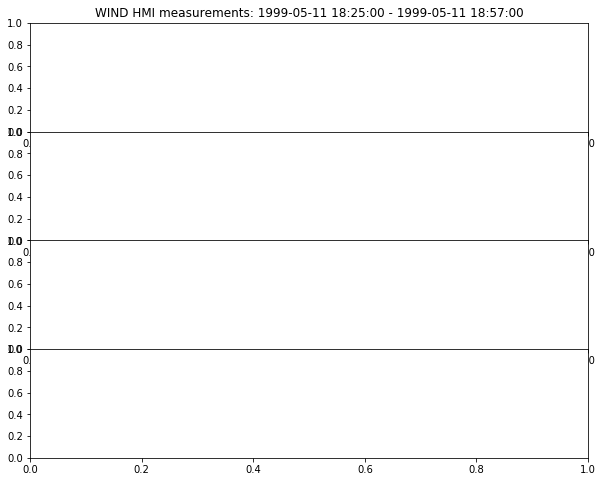

In [38]:
fig, axes = plt.subplots(4, figsize=(10, 8))
plt.subplots_adjust(hspace=0)

ax = axes[0]
ax.set_title(f'WIND HMI measurements: {t_start} - {t_end}')
ax.plot(
    data_MFI['Epoch'],data_MFI['BGSE'],
    label=f"{data_MFI['BGSE'].attrs['LABLAXIS']}[{data_MFI['BGSE'].attrs['UNITS']}]"
)

for ax in axes:
    ax.legend(loc='best')
    if ax != axes[-1]:
        ax.set_xticks([])

_ = 0;